In [1]:
# load libraries
library(dplyr)
library("edgeR")
library(Matrix)
library(gplots)
library(RColorBrewer)
library(irlba) 
library(proxy)
library(png)
library(tidyverse)
library(ComplexHeatmap)
library(here)


working_dir <- "/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor"

# load arguments
#args <- commandArgs(T)
#if(length(args)!=5){stop("Rscript normGBA.R <gene.sparse> <meta> <Zea_mays.AGPv4.36.Allgene.nuclear.bed> <prefix> <F>")}
#input_data <- as.character(args[1])
#meta <- as.character(args[2])
#gene <- as.character(args[3])
#prefix <- as.character(args[4])



#gene_bodysorghum_bicolor_tis_leaf_nmf_step_2_knn_27.out.de_novo.rds
input <- here(working_dir,"00.data/sorghum_bicolor.gene_body_acc_leaf_v3_clustering_strict.mesophyll.counts.txt")
#input_2 <- here("/home/jpm73279/r_script_dev/lw_plotting","zea_mays.normalized_gene_acc_scores.leaf_svd_knn_100_strict.GBaccessibility.sparse")
meta <- here("/scratch/jpm73279/comparative_single_cell/08.annotation_figures/sorghum_bicolor/00.data/Sb.leaf_annot.V5.meta.frozen.txt")
gene <- here(working_dir,"00.data/Sb.orthos_from.zm.markers.de_novo.all.leaf.visualize.txt")
gene_DA <- here(working_dir,"00.data/Sbicolorv5.1.gene.bed")
#prefix <- "TEST_SORGHUM_TEST"

meta_data <- read.delim(meta)
gene_markers <- read.delim(gene)
gene_markers <- gene_markers  %>%
    arrange(type)

c4_marker_list <- here(working_dir, "00.data/Sb_markers.Pm_bs_meso.markers.header.bed")
c4_markers <- readr::read_delim(c4_marker_list, delim = "\t")
gene_markers <- gene_markers  %>%
    arrange(type)

gene_markers <- bind_rows(gene_markers, c4_markers)
all_markers <- gene_markers$geneID


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: limma


Attaching package: 'gplots'


The following object is masked from 'package:stats':

    lowess



Attaching package: 'proxy'


The following object is masked from 'package:Matrix':

    as.matrix


The following objects are masked from 'package:stats':

    as.dist, dist


The following object is masked from 'package:base':

    as.matrix


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0.9000     v readr     2.1.4     
v ggplot2   3.4.1          v stringr   1.5.0     
v lubridate 1.9.2          v tibble    3.2.1     
v purrr     1.0.1          v tidyr     1.3.0     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x tidyr::expand() masks Matrix::expand()
x dplyr::filter() m

In [2]:
head(meta_data)

,cellID,total,tss,acrs,ptmt,nSites,log10nSites,pTSS,FRiP,pOrg,⋯,sb_v4_annot.subcluster_v2.y,sb.epidermis_lc,sb_v4_annot.subcluster_v2.x.x,sb_v4_annot.subcluster_v2.y.y,sb.vasculature_lc,v4_annotation_n,final_annotation_safe,final_annotation,reduce_resolution_annotation,final_annotation_n
,<chr>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,BC:Z:CGATGTTAGCTTATACGGTGAAACGCA-Sorghum_leaf.sciATAC_rep1,1036,392,259,92,164,2.214844,0.3783784,0.2500000,0.08880309,⋯,NA,NA,NA,NA,NA,protoderm_ncell_2290,protoderm,protoderm,protoderm,protoderm_n_cell_2245
2,BC:Z:ATCACGAGTCAATGTTTCAAAAGAGCT-Sorghum_leaf.sciATAC_rep1,1046,407,234,154,145,2.161368,0.3891013,0.2237094,0.14722753,⋯,NA,NA,NA,NA,NA,epidermis_ncell_4630,epidermis,epidermis,epidermis,epidermis_n_cell_4214
3,BC:Z:TAGCTTCCGTCCGTCCTCGTACGGGAA-Sorghum_leaf.sciATAC_rep2,502,271,343,46,170,2.230449,0.5398406,0.6832669,0.09163347,⋯,NA,NA,NA,NA,NA,companion_cells_sieve_elements_ncell_591,companion_cells_sieve_elements,companion_cells_sieve_elements,companion_cells_sieve_elements,companion_cells_sieve_elements_n_cell_562
4,BC:Z:TTAGGCAGTTCCCAATTGTTTCGTCAT-Sorghum_leaf.sciATAC_rep1,13026,7741,8942,1078,4004,3.602494,0.5942730,0.6864732,0.08275756,⋯,NA,NA,NA,NA,NA,protoderm_ncell_2290,protoderm,protoderm,protoderm,protoderm_n_cell_2245
5,BC:Z:ATCACGGGCTACGGCAGGTCCGCGATG-Sorghum_leaf.sciATAC_rep1,4353,2462,3632,52,1665,3.221414,0.5655870,0.8343671,0.01194578,⋯,NA,NA,NA,NA,NA,protoderm_ncell_2290,protoderm,protoderm,protoderm,protoderm_n_cell_2245
6,BC:Z:TTAGGCTAGCTTGACTTATGAGCTGAC-Sorghum_leaf.sciATAC_rep1,3812,1521,1700,142,846,2.927370,0.3990031,0.4459601,0.03725079,⋯,NA,NA,NA,NA,NA,ground_meristem_ncell_880,unknown_desc_1,unknown;1,unknown;1,unknown_desc_1_n_cell_832


In [3]:
unique(meta_data$cell_type)
`%ni%` <- Negate(`%in%`)

meta_data  <- meta_data %>% 
  mutate(cell_type = case_when(reduce_resolution_annotation == "phloem_sieve_elements" ~ "companion_cells/sieve_elements",
                               reduce_resolution_annotation == "companion_cells" ~ "companion_cells/sieve_elements",
                               reduce_resolution_annotation == "companion_cells_sieve_elements" ~ "companion_cells/sieve_elements",
                               reduce_resolution_annotation == "mesophyll;developing" ~ "mesophyll developing",
                               TRUE ~ reduce_resolution_annotation)) %>% 
  dplyr::filter(is.na(cell_type) != TRUE)  %>%  
  mutate(cell_type = str_replace_all(cell_type, "_", " "))  %>% 
  mutate_at(vars(cell_type), 
            list(factor)) %>% 
  dplyr::filter(cell_type != "unknown;1")

meta_data  %>% 
    group_by(cell_type)  %>% 
    summarise(counts = n())



NULL

cell_type,counts
<fct>,<int>
bundle sheath,1777
companion cells/sieve elements,562
epidermis,4214
mesophyll,5107
procambial meristem,564
protoderm,2245


In [4]:
all_markers <- gene_markers$geneID

raw_cpm_counts_all_genes <- read_delim(input, delim="\t", col_names = c("gene_name", "barcode", "accessability")) %>%
    dplyr::mutate(cellID = barcode)  %>%
    dplyr::mutate(geneID = gene_name)

colnames(meta_data)

merged_meta_cpm_information <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))  %>%
    #mutate(safe_cluster_name = str_c("Louvain_C", LouvainClusters, sep ="_"))  %>%
    #dplyr::select(-LouvainClusters)  %>%
    group_by(cell_type, geneID)  %>%
    summarise(counts = sum(accessability, na.rm = TRUE))

### Alt CPM Calc
merged_meta_cpm_information_copied <- merged_meta_cpm_information
catch <- merged_meta_cpm_information_copied  %>%
    group_by(cell_type) %>%
    group_map(~(cpm(.x$counts, log = FALSE, group = .f)), .keep = TRUE)  %>%
    unlist()



caught_values <- as_tibble(catch)
see <- ungroup(merged_meta_cpm_information_copied)
merged_meta_cpm_information_copied<- bind_cols(merged_meta_cpm_information_copied,caught_values)  %>% 
    rename(grouped_CPM = value)

head(merged_meta_cpm_information_copied)

head(merged_meta_cpm_information_copied)
altered_deseq2 <- merged_meta_cpm_information_copied %>% 
    dplyr::select(-counts) %>% 
    pivot_wider(names_from = geneID, values_from = grouped_CPM, values_fill = 0) %>% 
    pivot_longer(cols = -cell_type, names_to = "geneID", values_to = "grouped_CPM") %>% 
    group_by(geneID) %>% 
    mutate(Zscore = scale(grouped_CPM)) %>% 
    ungroup()  %>% 
    #mutate(relative_accessability = rescale(Zscore, to = c(0,1))) %>% 
    group_by(cell_type)  %>% 
    mutate(Zscore_group = scale(Zscore))

# Create Proportion Cells Accessible Metrics ------------------------------
merged_meta_cellID_values <- left_join(meta_data, raw_cpm_counts_all_genes, by = c("cellID"))
take_unq_genes <- unique(merged_meta_cellID_values$geneID)


merged_meta_cellID_values_all_genes <- merged_meta_cellID_values %>% 
    select(cellID, cell_type, accessability, geneID) 

dim(merged_meta_cellID_values_all_genes)

dim(unique(merged_meta_cellID_values_all_genes))

merged_meta_cellID_values_all_genes  %>% 
    group_by(cellID, cell_type, accessability, geneID)  %>% 
    summarise(counts=n())  %>% 
    dplyr::filter(counts > 1)

colnames(merged_meta_cellID_values_all_genes)
colnames(merged_meta_cellID_values_all_genes)

wider_all_genes_altered <- merged_meta_cellID_values_all_genes %>% 
                    distinct()  %>% 
                    pivot_wider(names_from = geneID, 
                                values_from = accessability,  
                                values_fill = 0) %>% 
                    pivot_longer(cols = c(-cell_type, -cellID), 
                                 names_to = "geneID", 
                                 values_to = "accessability") %>% 
                    mutate(expression_bool = case_when(accessability < 1 ~ 0,
                                                       accessability >= 1 ~ 1)) %>% 
                    group_by(cell_type, geneID) %>% 
                    summarise(total_cells = n(), 
                              proportion_expressing = (sum(expression_bool)/total_cells * 100))


#colnames(merged_meta_cellID_values_all_genes)
#merged_meta_cellID_values_all_genes %>% 
#    group_by(V3_annotation_n) %>% 
#    select(-accessability, -cellID) %>% 
#    unique() %>% 
#    summarise(count = n())

### Updated DE-seq2 with only Well established Markers
#good_marker_list <- c('pepc1', "cah1", "ssu1", "ssu2", "agp2", "me_ortho_count_23", "sut1", "ccr1", "dct2", "mute",
#                     "shr1_v4v5count_1", "sut7", 'sweet13a','sweet13b','sweet13c','sweet1b', "ba2", 
#                      "cvp2", "fdl", "cvl2", "ad1", "gpat12", "acl1", "bm5", "fcp1", "ids1", "KCS1", 
#                      "mdh6", "vt2","ZmAPL", "ZmSWEET11", "zyb14", "gpat11", "gpat12", "ocl5", "ocl4", 
#                      "slac_v4v5count_1", "bhlh43", "dct2", "KCS1", "scr1", "ZmLAX2", "acl5", "pdf1", 
#                      "pdf2", "ZmLRD3", "ad1", "ZmSMXL4_v4v5count_1", "SID1", "bk1_v4v5count_1", "ZmSMXL5")

#good_gene_markers <- gene_markers  %>% 
#    filter(name %in% good_marker_list)
#head(good_gene_markers)

Rows: 35643126 Columns: 3
-- Column specification --------------------------------------------------------
Delimiter: "\t"
chr (2): gene_name, barcode
dbl (1): accessability

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "cellID"                        "total"                        
 [3] "tss"                           "acrs"                         
 [5] "ptmt"                          "nSites"                       
 [7] "log10nSites"                   "pTSS"                         
 [9] "FRiP"                          "pOrg"                         
[11] "tss_z"                         "acr_z"                        
[13] "sites_z"                       "qc_check"                     
[15] "background"                    "cellbulk"                     
[17] "is_cell"                       "sampleID"                     
[19] "umap1"                         "umap2"                        
[21] "doubletscore"                  "d.type"                       
[23] "LouvainClusters"               "LouvainCluster_t"             
[25] "louvain_clusters_sub"          "sb_v4_annot"                  
[27] "sb_v4_annot.subcluster_v2"     "sb.mesophyll_lc"              
[29] "sb_v4_annot.subcluster_v2.x"   "sb_v4_annot.subcluster_v2.y"  
[31] "sb.epidermis_lc"               "sb_v4_annot.subcluster_v2.x.x"
[33] "sb_v4_annot.subcluster_v2.y.y" "sb.vasculature_lc"            
[35] "v4_annotation_n"               "final_annotation_safe"        
[37] "final_annotation"              "reduce_resolution_annotation" 
[39] "final_annotation_n"            "cell_type"

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


cell_type,geneID,counts,grouped_CPM
<fct>,<chr>,<dbl>,<dbl>
bundle sheath,888jpa7.g114936.t1.g,6,0.8515353
bundle sheath,888jpa7.g116981.t1.g,34,4.8253664
bundle sheath,888jpa7.g117717.t1.g,548,77.7735532
bundle sheath,888jpa7.g121623.t1.g,140,19.8691559
bundle sheath,888jpa7.g135363.t1.g,52,7.3799722
bundle sheath,888jpa7.g135679.t1.g,94,13.3407190


cell_type,geneID,counts,grouped_CPM
<fct>,<chr>,<dbl>,<dbl>
bundle sheath,888jpa7.g114936.t1.g,6,0.8515353
bundle sheath,888jpa7.g116981.t1.g,34,4.8253664
bundle sheath,888jpa7.g117717.t1.g,548,77.7735532
bundle sheath,888jpa7.g121623.t1.g,140,19.8691559
bundle sheath,888jpa7.g135363.t1.g,52,7.3799722
bundle sheath,888jpa7.g135679.t1.g,94,13.3407190


[1] 22632892        4

[1] 22632892        4

`summarise()` has grouped output by 'cellID', 'cell_type', 'accessability'. You
can override using the `.groups` argument.


cellID,cell_type,accessability,geneID,counts
<chr>,<fct>,<dbl>,<chr>,<int>


[1] "cellID"        "cell_type"     "accessability" "geneID"

[1] "cellID"        "cell_type"     "accessability" "geneID"

`summarise()` has grouped output by 'cell_type'. You can override using the
`.groups` argument.


In [5]:
### 7/23/2022 List of maarkers
good_marker_list <- c('pepc1', "cah1", "ssu2__ssu1", "ssu2", "agp2", "me3_ortho_count_2", 
                      "sut1__sut7", 
                      "dct2", "shr2h__shr2", "gl1", "ZmAAP6_4","ocl1",
                     "shr1_v4v5count_1", 'sweet13a','sweet13b','sweet13c','sweet1b', 
                      "cvp2", "fdl", "cvl2", "ad1", "ids1", "knox8",
                      "mdh6", "vt2","ZmAPL", "ZmSWEET11", "zyb14", "ocl5", "ocl4", "hkt1_2", "kch1",
                      "slac_v4v5count_1", "dct2", "scr1h__scr1", "ZmLAX2", "pdf1", "ZmOPL2",
                      "xcp1", "gpat12", "pdf1", "pdf2","snd1","dct2_ortho_count_1", "mute",
                      "pdf2", "ZmLRD3", "ad1", "ZmSMXL4_v4v5count_1", "ZmSMXL5",            
"AspAT_1__AspAT_2",
"AspAT_3__AspAT_4",
"CA_1__CA_2",
"Dit_1__Dit_2",
"Dit_3_ortho_count_1",
"Dit_3_ortho_count_2",
"NADP-MDH_1__NADP-MDH_2",
"NADP-MDH_3_ortho_count_1",
"NADP-MDH_3_ortho_count_2",
"NADP-ME_1_ortho_count_1__NADP-ME_2_ortho_count_1",
"NADP-ME_1_ortho_count_2__NADP-ME_2_ortho_count_2",
"NADP-ME_1_ortho_count_3__NADP-ME_2_ortho_count_3",
"PEP-CK_1__PEP-CK_2",
"PEP-CK_3",
"PEPC_1__PEPC_2",
"PPA1__PPA3_1",
"PPA2_1",
"PPA2_2__PPA3_2",
"PPDK_1__PPDK_2",
"PPDK-RP_ortho_count_1",
"PPDK-RP_ortho_count_2",
"PPDK-RP_ortho_count_3",
"PPT_1__PPT_2",
"PPT_3__PPT_4",
"rca1",
"rca3",
"rca4",
"cah6_ortho_count_1",
"cah6_ortho_count_2",
"cah5__cah4",
"cah1",
"bass1")

good_gene_markers <- gene_markers  %>% 
    filter(name %in% good_marker_list)
head(good_gene_markers)

marker_final_plotting <- left_join(altered_deseq2, wider_all_genes_altered, by = c("cell_type", "geneID")) %>% 
        left_join(., gene_markers, by = c("geneID"))

test_marker_clust <- marker_final_plotting  %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(cell_type, Zscore, name)  %>% 
    pivot_wider(names_from = cell_type, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying

row.names(test_marker_clust) <- test_marker_clust$name  # put gene in `row`
test_marker_clust <- test_marker_clust[,-1] #drop gene column as now in rows
clust <- hclust(dist(test_marker_clust %>% as.matrix())) # hclust with distance matrix

,chr,star,end,geneID,name,type
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
1,Chr01,5763796,5774227,Sobic.001G075101,knox8,"SAM,ground_meristem,provascular_strands,inflorescence_meristem,spikelet_meristem"
2,Chr07,68777545,68782096,Sobic.007G226700,dct2_ortho_count_1,bundle_sheath
3,Chr05,3935393,3936843,Sobic.005G042000,ssu2__ssu1,bundle_sheath
4,Chr03,3358317,3363996,Sobic.003G036200,me3_ortho_count_2,bundle_sheath
5,Chr05,76932114,76935511,Sorbiv5.1_pg32688.valid.m24.g,rca1,bundle_sheath
6,Chr05,76938370,76940529,Sobic.005G231600,rca3,bundle_sheath


Warning message in left_join(., gene_markers, by = c("geneID")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 7174 of `x` matches multiple rows in `y`.
i Row 78 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


In [6]:
mat <- marker_final_plotting %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(cell_type, Zscore, name)  %>% 
    pivot_wider(names_from = cell_type, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$name  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
v_clust <- hclust(dist(mat %>% as.matrix() %>% t())) # hclust with distance matrix

In [7]:
#options(repr.plot.width=8, repr.plot.height=10)
fixed_order_strings <- v_clust$labels[v_clust$order]
fixed_order_strings <- gsub("companion.cells.sieve.elements", "companion cells/sieve elements", fixed_order_strings)
fixed_order_strings <- gsub("\\.", " ", fixed_order_strings)
options(repr.plot.width=8, repr.plot.height=12)

sb.dotplot_catch <- marker_final_plotting  %>% 
    mutate(Gene_name = factor(name, clust$labels[clust$order]),
          Cluster_name = factor(cell_type, levels = fixed_order_strings)) %>% 
    filter(is.na(Gene_name) != TRUE) %>% 
    ggplot(., aes(x=Cluster_name, y = Gene_name, 
                               color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90)) + scale_colour_gradient2() +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), panel.background = element_blank(), axis.line.x = element_line(color="black", size = 1), axis.line.y = element_line(color="black", size = 1)) +
    ggtitle("Sb Z Score of Markers - Across Annotations")





Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


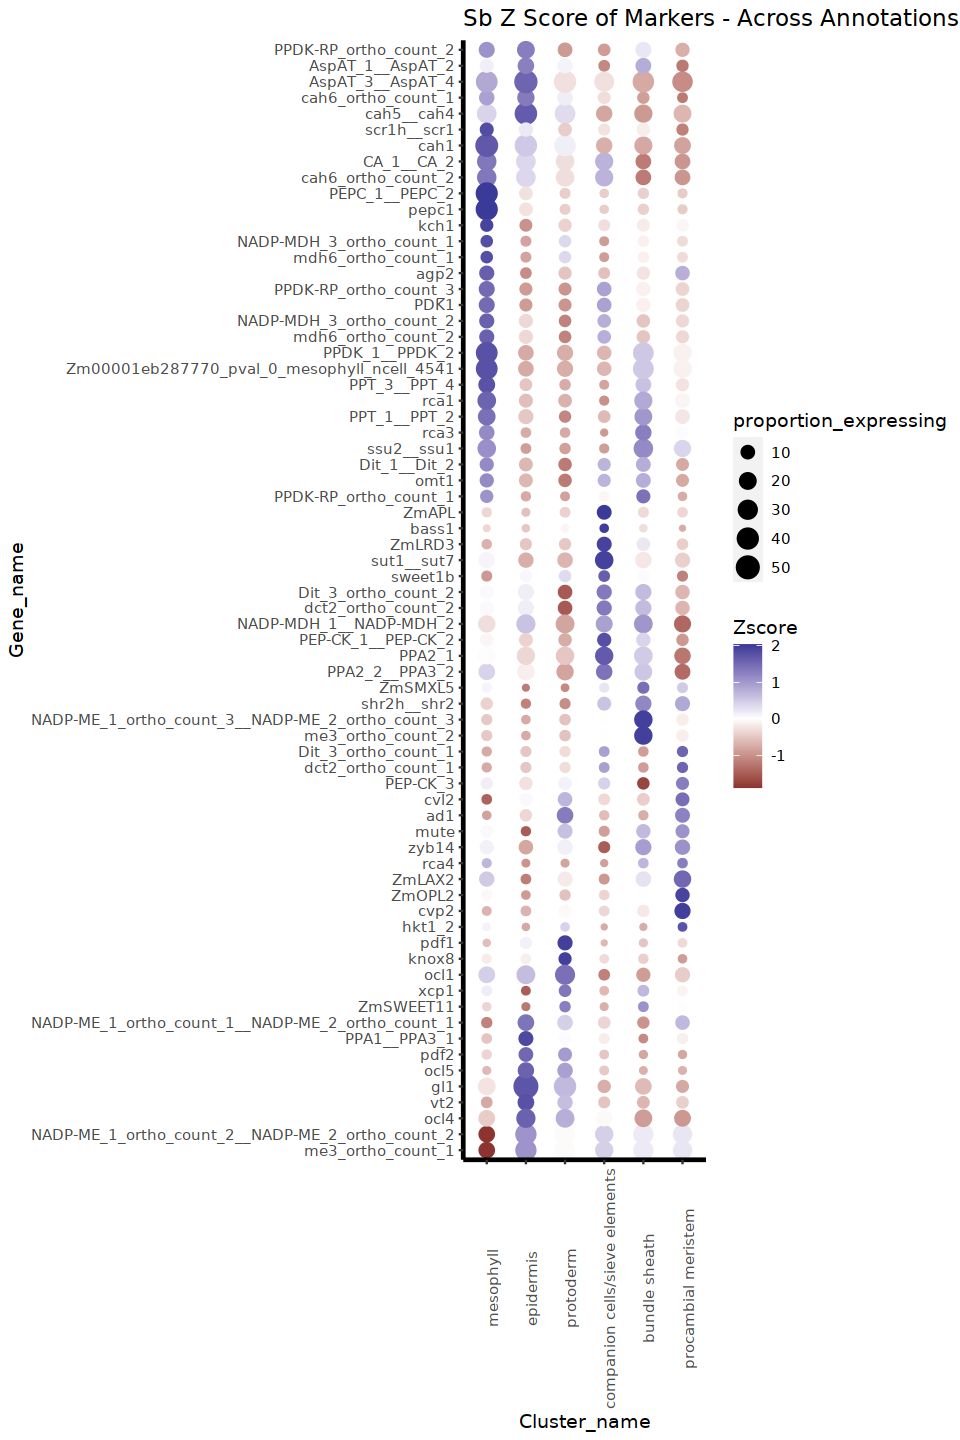

In [8]:
sb.dotplot_catch

In [9]:
ggsave("Sb_selected_marker_dotplot.supplamental.pdf", plot = sb.dotplot_catch,
    path = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_1/dotplots",
    width = 8, height = 12,
    units = c('in'), limitsize = FALSE, dpi = 300)

# Generate Dotplot using 2-4 Markers per cell-type. Sb Figure 1 dotplot 

In [10]:
### 7/23/2022 List of maarkers
good_marker_list <- c('pepc1',"PPDK_1__PPDK_2", "CA_1__CA_2", "cah1", #Ms Markers                      
                      "ssu2__ssu1", "me3_ortho_count_2", "Dit_3_ortho_count_1",#BS Markers
                      "sut1__sut7", "ZmAPL", "ZmLRD3",#companion cells
                      "shr2h__shr2", "shr1_v4v5count_1", "cvp2", "ZmOPS", #vasculature/procambium
                      "gl1","gpat11__gpat12","gpat11", "vt2", #epidermis
                      "ocl1", "pdf2", "pdf1", #protoderm
                      "ocl1", "ocl4") #protoderm



good_gene_markers <- gene_markers  %>% 
    filter(name %in% good_marker_list)


marker_final_plotting <- left_join(altered_deseq2, wider_all_genes_altered, by = c("cell_type", "geneID")) %>% 
        left_join(., gene_markers, by = c("geneID"))

test_marker_clust <- marker_final_plotting  %>% 
    filter(name %in% good_marker_list)  %>% 
    ungroup() %>% 
    dplyr::select(cell_type, Zscore, name)  %>% 
   dplyr::mutate(name = case_when(name == "pepc1" ~ "PEPC1", 
                                   name == "PPDK_1__PPDK_2" ~ "PDK2",
                                   name == "CA_1__CA_2" ~ "cah6", 
                                   name == "Dit_3_ortho_count_2" ~ "dct2",
                                   name == "ZmAPL" ~ "glk53",
                                   name == "ZmLRD3" ~ "limtf13",
                                   name =="me3_ortho_count_2" ~ "me3",
                                   name == "shr1_v4v5count_1" ~ "gras58",
                                   TRUE ~ name
                                  )) %>% 
    pivot_wider(names_from = cell_type, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying

row.names(test_marker_clust) <- test_marker_clust$name  # put gene in `row`
test_marker_clust <- test_marker_clust[,-1] #drop gene column as now in rows
clust <- hclust(dist(test_marker_clust %>% as.matrix())) # hclust with distance matrix

mat <- marker_final_plotting %>% 
    filter(geneID %in% good_gene_markers$geneID)  %>% 
    ungroup() %>% 
    dplyr::select(cell_type, Zscore, name)  %>% 
    pivot_wider(names_from = cell_type, values_from = Zscore) %>% 
      data.frame() # make df as tibbles -> matrix annoying
row.names(mat) <- mat$name  # put gene in `row`
mat <- mat[,-1] #drop gene column as now in rows
v_clust <- hclust(dist(mat %>% as.matrix() %>% t())) # hclust with distance matrix

options(repr.plot.width=8, repr.plot.height=10)
fixed_order_strings <- v_clust$labels[v_clust$order]
fixed_order_strings <- gsub("companion.cells.sieve.elements", "companion cells/sieve elements", fixed_order_strings)
fixed_order_strings <- gsub("\\.", " ", fixed_order_strings)


Warning message in left_join(., gene_markers, by = c("geneID")):
"Detected an unexpected many-to-many relationship between `x` and `y`.
i Row 7174 of `x` matches multiple rows in `y`.
i Row 78 of `y` matches multiple rows in `x`.
i If a many-to-many relationship is expected, set `relationship =
  "many-to-many"` to silence this warning."


In [11]:
fixed_order_strings

[1] "companion cells/sieve elements" "bundle sheath"                 
[3] "procambial meristem"            "mesophyll"                     
[5] "epidermis"                      "protoderm"

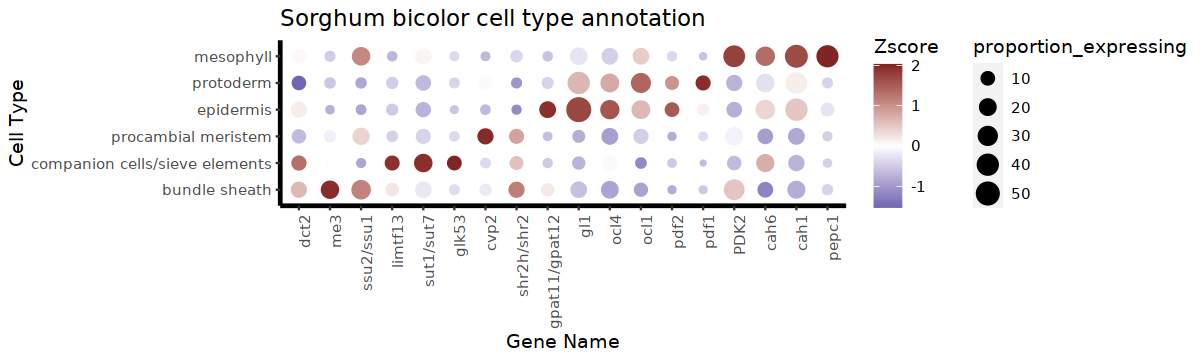

In [14]:


#gene_order <- c('limtf13', 'sut1__sut7', 'glk53', 'vt2', "ZmOPS" ,'cvp2', 'shr2h__shr2', 'dct2', 'me3', 'ssu2__ssu1', 'PDK2', 'cah6', 'cah1', 'pepc1', 'ocl4', 'ocl1', 'pdf2', 'pdf1', 'gpat11__gpat12', 'gl1')



library(scales) # for muted
cell_type_order <- c('bundle sheath', 'companion cells/sieve elements', 'procambial meristem', 
                'epidermis', 'protoderm', 'mesophyll', 'mesophyll developing')


gene_order <- c('dct2', 'me3', 'ssu2__ssu1' ,'limtf13', 'sut1__sut7', 'glk53', '
    ZmOPS', 'cvp2', 'shr2h__shr2', 
    'gpat11__gpat12', 'gl1',                
    'ocl4', 'ocl1', 'pdf2', 'pdf1',                
                'PDK2', 'cah6', 'cah1', 'pepc1')



options(repr.plot.width=10, repr.plot.height=3)
sb_figure_marker_dotplot <- marker_final_plotting  %>% 
   dplyr::mutate(name = case_when(name == "pepc1" ~ "pepc1", 
                                   name == "PPDK_1__PPDK_2" ~ "PDK2",
                                   name == "CA_1__CA_2" ~ "cah6", 
                                   name == "Dit_3_ortho_count_2" ~ "dct2",
                                   name == "ZmAPL" ~ "glk53",
                                   name == "ZmLRD3" ~ "limtf13",
                                   name =="me3_ortho_count_2" ~ "me3",
                                   name == "shr1_v4v5count_1" ~ "gras58",
                                   TRUE ~ name
                                  )) %>% 
     mutate(Gene_name = factor(gsub("__", "/", name), levels = gsub("__", "/", gene_order)),
            Cluster_name = factor(cell_type, levels = cell_type_order)) %>% 
    filter(is.na(Gene_name) != TRUE) %>% 
    ggplot(., aes(y=Cluster_name, x = Gene_name, 
                  color = Zscore, size = proportion_expressing)) + 
    geom_point() + theme(axis.text.x = element_text(angle = 90, hjust = 1)) +     
    scale_colour_gradient2(low= muted("blue"), high=muted("red")) +
    theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(), 
          panel.background = element_blank(), axis.line.x = element_line(color="black", size = 1), 
          axis.line.y = element_line(color="black", size = 1), legend.box = "horizontal") +
    ggtitle("Sorghum bicolor cell type annotation") +
    labs(x = "Gene Name", y = "Cell Type")

sb_figure_marker_dotplot


In [15]:
ggsave("sb_selected_marker_dotplot.main_figure.pdf", plot = sb_figure_marker_dotplot,
    path = "/home/jpm73279/data_copy_over/comparative_single_cell_imgs/figures/figure_1/dotplots",
    width = 10, height = 3,
    units = c('in'), limitsize = FALSE, dpi = 300)